## Disease Prediction

### Dataset Source:  
https://www.kaggle.com/datasets/itachi9604/disease-symptom-description-dataset?select=dataset.csv 

### Target Outcome:  
1. Train a machine learning model to predict disease based on symptoms.  
2. Deploy the model to be used for application.  

### Import Dataset

In [1]:
import pandas as pd

df = pd.read_csv('Disease_Symptom_Prediction\dataset.csv')

#### Dataset Exploration

In [2]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Remove _  and trailing space from Symptom strings

In [3]:
for col in df.columns:
    df[col] = df[col].str.replace('_', ' ')

for col in df.columns:
    df[col] = df[col].str.strip()

df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Shape of Data

In [4]:
print("There are ", df.shape[0], " rows and ", df.shape[1], " columns.")

There are  4920  rows and  18  columns.


#### Creating a column with all symptoms for each row

In [5]:
df["All_Symptoms"] = 0

for i in range(df.shape[0]):
    values = df.iloc[i].values
    values = values.tolist()
    if 0 in values:
        df["All_Symptoms"][i] = values[1:values.index(0)]
    else:
        df["All_Symptoms"][i] = values[1:]

df.head()

C:\Users\kianm\AppData\Local\Temp\ipykernel_17264\1528610647.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["All_Symptoms"][i] = values[1:values.index(0)]
C:\Users\kianm\AppData\Local\Temp\ipykernel_17264\1528610647.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['itching', 'skin rash', 'nodal skin eruptions', 'dischromic  patches', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df["All_Symptoms"][i] = values[1:values.index(0)]


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,All_Symptoms
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, skin rash, nodal skin eruptions, dis..."
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[skin rash, nodal skin eruptions, dischromic ..."
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, nodal skin eruptions, dischromic pa..."
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, skin rash, dischromic patches, nan,..."
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, skin rash, nodal skin eruptions, nan..."


In [6]:
diseaseAllSymptoms = df[['Disease', 'All_Symptoms']]
diseaseAllSymptoms.head()

,Disease,All_Symptoms
0,Fungal infection,"[itching, skin rash, nodal skin eruptions, dis..."
1,Fungal infection,"[skin rash, nodal skin eruptions, dischromic ..."
2,Fungal infection,"[itching, nodal skin eruptions, dischromic pa..."
3,Fungal infection,"[itching, skin rash, dischromic patches, nan,..."
4,Fungal infection,"[itching, skin rash, nodal skin eruptions, nan..."


#### Converting Dataframe with Symptoms as columns

In [7]:
column_values = df[['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17']].values.ravel()

In [8]:
symps = pd.unique(column_values) 
symps = symps.tolist()
symps = [i for i in symps if str(i) != 'nan']
symptoms= pd.DataFrame(columns=symps, index=df.index)
symptoms

,itching,skin rash,nodal skin eruptions,dischromic patches,continuous sneezing,shivering,chills,watering from eyes,stomach pain,acidity,...,bladder discomfort,foul smell of urine,continuous feel of urine,skin peeling,silver like dusting,small dents in nails,inflammatory nails,blister,red sore around nose,yellow crust ooze
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
symptoms['Symptoms'] = df['All_Symptoms']

for i in symps:
    symptoms[i] = symptoms.apply(lambda x:1 if i in x.Symptoms else 0, axis=1)

symptoms['Diesease'] = df['Disease']
symptoms_df = symptoms.drop("Symptoms", axis=1)
symptoms_df.head()

C:\Users\kianm\AppData\Local\Temp\ipykernel_17264\1716308673.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  symptoms['Diesease'] = df['Disease']


,itching,skin rash,nodal skin eruptions,dischromic patches,continuous sneezing,shivering,chills,watering from eyes,stomach pain,acidity,...,foul smell of urine,continuous feel of urine,skin peeling,silver like dusting,small dents in nails,inflammatory nails,blister,red sore around nose,yellow crust ooze,Diesease
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [10]:
symptoms_df.shape

(4920, 132)

### Checking how many rows of data per disease

In [11]:
symptoms_df['Diesease'].value_counts()

Diesease
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Alle

### Train, test, split data

In [12]:
features = symptoms_df.iloc[:,0:-1]
target = symptoms_df.iloc[:,-1:]

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

modelDecision = DecisionTreeClassifier()

#Train the model
modelDecision.fit(x_train, y_train)

#Prediction on test set
y_pred_dt = modelDecision.predict(x_test)

#Evaluate the model
decisionAccuracy = accuracy_score(y_test, y_pred_dt)

print("Accuracy for the Decision Tree model: ", decisionAccuracy)

Accuracy for the Decision Tree model:  1.0


#### Visualize Decision Tree

In [ ]:
from sklearn import tree
import graphviz
from graphviz import Source

#Source(tree.export_graphviz(modelDecision, out_file=None, class_names=True))

### Decision Tree Confusion Matrix
To visualize any false positives or False neagtives with confusion matrix

In [15]:
from sklearn.metrics import confusion_matrix

# Assuming y_test is the true labels and y_pred is the predicted labels
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree")
print("Confusion Matrix:\n", conf_matrix_dt)

Decision Tree
Confusion Matrix:
 [[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]


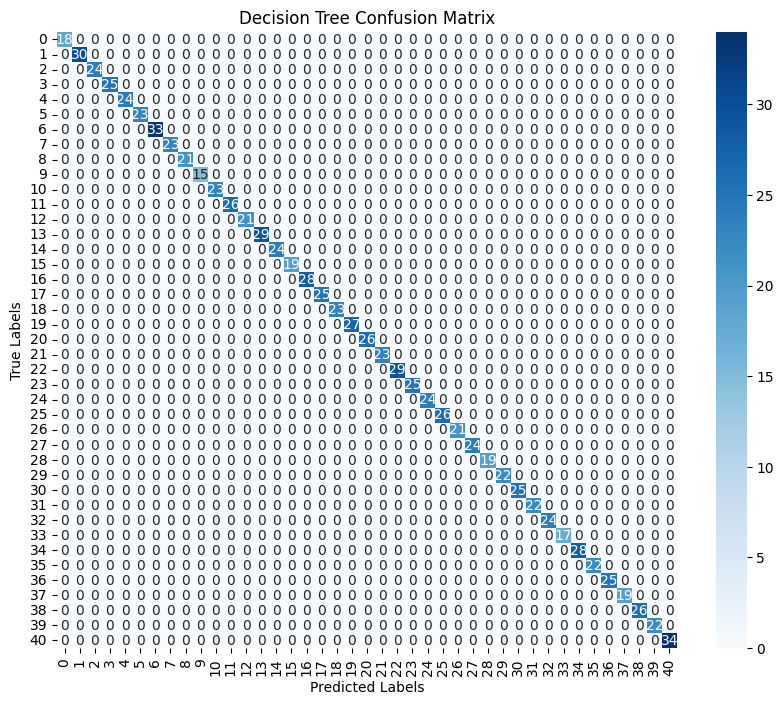

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

#Create Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", cbar=True)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Decision Tree Confusion Matrix")

plt.show()

### Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

modelRandomForest = RandomForestClassifier(n_estimators=100, random_state=42)

#Convert target values to 1D array for training in Random Forest
y_train_1d = y_train.values.ravel()

#Train the model
modelRandomForest.fit(x_train, y_train_1d)

#Prediction on test set
y_pred_rf = modelRandomForest.predict(x_test)

#Evaluate the model
randomForestAccuaracy = accuracy_score(y_test, y_pred_rf)

print("Accuracy for the Random Forest Classifier: ", randomForestAccuaracy)

Accuracy for the Random Forest Classifier:  1.0


In [18]:
from sklearn.metrics import confusion_matrix

# Assuming y_test is the true labels and y_pred is the predicted labels
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest")
print("Confusion Matrix:\n", conf_matrix_rf)

Random Forest
Confusion Matrix:
 [[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]


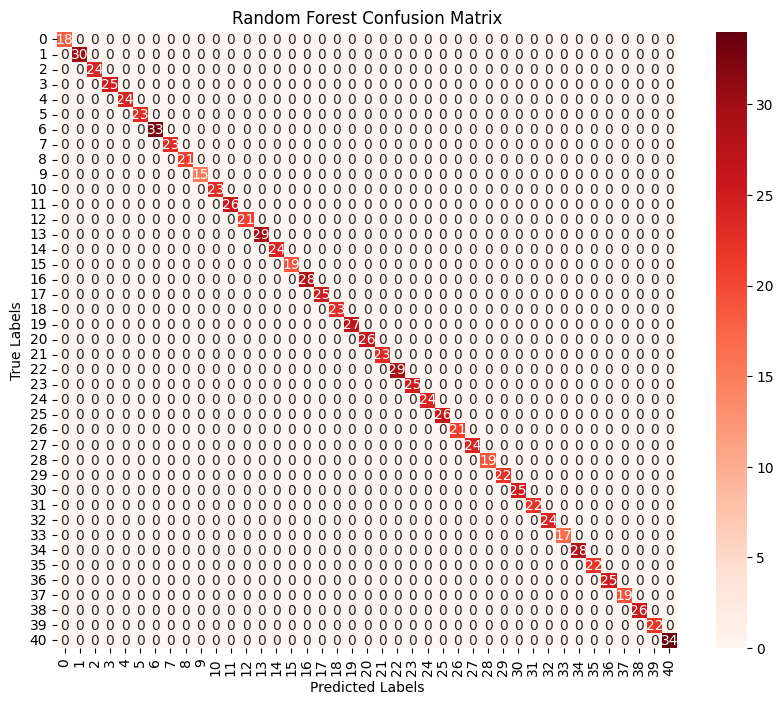

In [19]:
#Create Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Reds", cbar=True)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Random Forest Confusion Matrix")

plt.show()

### Model Training Summary
1. Both Decision Tree and Random Forest classifier gave 100% accuracy. 
2. Both were checked for false positives or false negatives using confusion matrix. No false positives nor false negatives were detected. 


### Selection of model for prediction
#### Decision Tree vs Random Forest

#### Decsion Tree
Advantages:
1. Simplicity: Decision trees are intuitive and easy to understand. 
2. Versatility: They can handle both categorical and numerical data, making them a flexible choice for a wide range of problems.
3. Feature selection: Decision trees inherently perform feature selection, using the most informative features first. 

Disadvantages:
1. Overfitting: Decision trees can create overly complex trees that don’t generalize well to unseen data. T
2. Bias towards features with more levels: Decision trees can be biased towards variables with more levels. Features with more unique values or categories may be favored over others, potentially leading to suboptimal trees.
3. Instability: Decision trees are sensitive to small changes in the data. A slight variation can result in a drastically different tree. 

#### Random Forests
In Random Forests, instead of just one decision tree making all the decisions, an "entire forest" of decision tress are created. Each tree gives it prediction based on the data seen. The final output is then determined by considering all the predictions made by all the trees in the forest.

Advantages:
1. Robust to Overfitting: Due to the random nature of the Random Forest (random sampling of data points and features), the model is less prone to overfitting than a single decision tree. Each individual tree gets a different view of the data, so the overall model can capture a broader picture of the data without as much risk of memorizing the training set.
2. Handles Large Datasets and Feature Spaces: Random Forest can easily handle datasets with many features and a large number of data points, making it a good choice for complex datasets.
3. Parallelizable: The training of the individual trees can be done in parallel, leading to faster training times.

Disadvantages:
1. Complexity: A Random Forest model creates a lot of trees (as defined by the user), which can make the model more complex and computationally expensive than a single decision tree.
2. Less Interpretability: While a single decision tree is easily interpretable, this is not the case with a Random Forest. The decision-making process of a Random Forest is not as straightforward to visualize or explain due to the aggregation of many trees.
3. Longer Prediction Time: Due to the need to make predictions with each tree in the forest, prediction time can be longer compared to other models.



Source: https://medium.com/@brandon93.w/decision-tree-random-forest-and-xgboost-an-exploration-into-the-heart-of-machine-learning-90dc212f4948


#### Selection of Model

Random forest is selected as the model as less prone to overfitting compared to Decision tree and generlize better to unseen data

### Random Forest Model

In [72]:
import pickle
'''
with open('RFPredictDiesease.pkl', 'wb') as file:
    pickle.dump(modelRandomForest, file)
'''

In [20]:
x_test.iloc[0:1, :]

,itching,skin rash,nodal skin eruptions,dischromic patches,continuous sneezing,shivering,chills,watering from eyes,stomach pain,acidity,...,bladder discomfort,foul smell of urine,continuous feel of urine,skin peeling,silver like dusting,small dents in nails,inflammatory nails,blister,red sore around nose,yellow crust ooze
373,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
y_test.iloc[0:1, :]

,Diesease
373,Acne


#### Load the model

In [23]:
import pickle
loaded_RF_model = pickle.load(open('RFPredictDiesease.pkl', 'rb'))
test = loaded_RF_model.predict(x_test.iloc[0:1, :])
print(test)

['Acne']


In [24]:
print(y_test.iloc[61:62, :])

             Diesease
1558  Hyperthyroidism


In [25]:
test2 = loaded_RF_model.predict(x_test.iloc[61:62, :])
print(test2)

['Hyperthyroidism']


In [26]:
x_test_pred = [i for i in x_test.iloc[61:62, :].values]
print(x_test_pred)
predicted = loaded_RF_model.predict(x_test_pred)
predicted[0]

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)]


c:\Users\kianm\anaconda3\envs\mlkm39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'Hyperthyroidism'

### Decision Tree Model

In [73]:
'''
with open('DTPredictDisease.pkl', 'wb') as fileDT:
    pickle.dump(modelDecision, fileDT)
'''

## TODO:
1. To decide how to load the features into the model for prediction
2. Group symptoms to narrow down symptoms for users to choose
3. To load model to a flask server
4. To upload model to AWS??

### ON HOLD

In [24]:
unique_symptoms = set()
for i, column in enumerate(symptoms_df.iloc[:, 0:-1]):
  unique_symptoms |= set(symptoms_df[column])

unique_symptoms_lst = list(unique_symptoms)
unique_symptoms_lst_cleaned = [i for i in unique_symptoms_lst if isinstance(i, str)]
for i in range(len(unique_symptoms_lst_cleaned)):
  print(i+1, ": ", unique_symptoms_lst_cleaned[i])


1 :   excessive_hunger
2 :   burning_micturition
3 :   yellowing_of_eyes
4 :   irritation_in_anus
5 :   yellow_urine
6 :   small_dents_in_nails
7 :   bruising
8 :   stomach_pain
9 :   dizziness
10 :   inflammatory_nails
11 :   abdominal_pain
12 :   sweating
13 :   enlarged_thyroid
14 :   silver_like_dusting
15 :   receiving_blood_transfusion
16 :   receiving_unsterile_injections
17 :   sinus_pressure
18 :   restlessness
19 :   passage_of_gases
20 :   runny_nose
21 :   constipation
22 :   swollen_blood_vessels
23 :   muscle_weakness
24 :   nodal_skin_eruptions
25 :   bloody_stool
26 :   cramps
27 :   internal_itching
28 :   anxiety
29 :  itching
30 :   headache
31 :   toxic_look_(typhos)
32 :   stiff_neck
33 :   dark_urine
34 :   family_history
35 :   distention_of_abdomen
36 :   mucoid_sputum
37 :   cough
38 :   knee_pain
39 :   extra_marital_contacts
40 :   spinning_movements
41 :   diarrhoea
42 :   red_spots_over_body
43 :   phlegm
44 :   unsteadiness
45 :   pain_in_anal_region
46 : 

##### Symptoms to drop as not easily detected by patients
acidity, silver_like_dusting, toxic_look_(typhos), irregular_sugar_level, receiving_unsterile_injections, mood_swings, altered_sensorium, acute_liver_failure, stomach_bleeding, enlarged_thyroid, dischromic _patches, distention_of_abdomen, family_history, swelled_lymph_nodes, history_of_alcohol_consumption, malaise, receiving_blood_transfusion, extra_marital_contacts, scurring, polyuria, obesity,

In [25]:
symptoms_to_drop = ['acidity', 'silver_like_dusting', 'toxic_look_(typhos)', 'irregular_sugar_level', 'receiving_unsterile_injections', 'mood_swings', 'altered_sensorium', 'acute_liver_failure', 'stomach_bleeding', 
                    'enlarged_thyroid', 'dischromic _patches', 'distention_of_abdomen', 'family_history', 'swelled_lymph_nodes', 'history_of_alcohol_consumption', 'malaise', 'receiving_blood_transfusion', 
                    'extra_marital_contacts', 'scurring', 'polyuria', 'obesity']

In [26]:
import numpy as np
#replace NaN with ''
df_no_nan = df[df.columns[:-1]].replace(np.nan, '')

#Boolean mask
mask = df_no_nan[df_no_nan.columns[:-1]].map(lambda x: any(symptom in x for symptom in symptoms_to_drop)).any(axis=1)

#Matching rows that contains the symptoms in the list
matching_rows = df[mask]

#List of disease that contains the symptoms
disease_in_list = list(matching_rows['Disease'].unique())

for i in range(len(disease_in_list)):
    print(i+1, ": ", disease_in_list[i])

1 :  Fungal infection
2 :  GERD
3 :  AIDS
4 :  Diabetes 
5 :  Bronchial Asthma
6 :  Migraine
7 :  Paralysis (brain hemorrhage)
8 :  Chicken pox
9 :  Dengue
10 :  Typhoid
11 :  Hepatitis B
12 :  Hepatitis C
13 :  Hepatitis E
14 :  Alcoholic hepatitis
15 :  Tuberculosis
16 :  Common Cold
17 :  Pneumonia
18 :  Varicose veins
19 :  Hypothyroidism
20 :  Hyperthyroidism
21 :  Acne
22 :  Psoriasis


## Disease to Use

In [28]:
diseaseToUse = ['Allergy', 'Chronic cholestasis', 'Drug Reaction', 'Peptic ulcer diseae', 'Gastroenteritis', 'Hypertension ', 'Jaundice', 'Malaria',
                   'Heart attack', 'Arthritis', 'Urinary tract infection', 'Impetigo', 'Fungal infection', 'Bronchial Asthma', 'Migraine',
                   'Chicken pox', 'Dengue', 'Typhoid', 'Tuberculosis', 'Common Cold', 'Pneumonia', 'Psoriasis']

print("Diseases To Use: \n")
for i in range(len(diseaseToUse)):
    print(i+1, ': ', diseaseToUse[i])


Diseases To Use: 

1 :  Allergy
2 :  Chronic cholestasis
3 :  Drug Reaction
4 :  Peptic ulcer diseae
5 :  Gastroenteritis
6 :  Hypertension 
7 :  Jaundice
8 :  Malaria
9 :  Heart attack
10 :  Arthritis
11 :  Urinary tract infection
12 :  Impetigo
13 :  Fungal infection
14 :  Bronchial Asthma
15 :  Migraine
16 :  Chicken pox
17 :  Dengue
18 :  Typhoid
19 :  Tuberculosis
20 :  Common Cold
21 :  Pneumonia
22 :  Psoriasis


In [29]:
#Filter out rows that are not in Disease to use

df_diseaseToUse = df[df.Disease.isin(diseaseToUse)]


In [30]:
disease_list = [i for i in df_diseaseToUse['Disease'].unique()]
for i in range(len(disease_list)):
    print(i+1, ":", disease_list[i])

1 : Fungal infection
2 : Allergy
3 : Chronic cholestasis
4 : Drug Reaction
5 : Peptic ulcer diseae
6 : Gastroenteritis
7 : Bronchial Asthma
8 : Hypertension 
9 : Migraine
10 : Jaundice
11 : Malaria
12 : Chicken pox
13 : Dengue
14 : Typhoid
15 : Tuberculosis
16 : Common Cold
17 : Pneumonia
18 : Heart attack
19 : Arthritis
20 : Urinary tract infection
21 : Psoriasis
22 : Impetigo


In [32]:

unique_symptoms_use = set()
for i, column in enumerate(df_diseaseToUse.iloc[:, 1:]):
  unique_symptoms_use |= set(df[column])

unique_symptoms_use_lst = list(unique_symptoms_use)
unique_symptoms_use_lst_clean =[i for i in unique_symptoms_use_lst if isinstance(i, str)]
for i in range(len(unique_symptoms_use_lst_clean)):
  print(i+1, ": ", unique_symptoms_use_lst_clean[i])

1 :   excessive_hunger
2 :   burning_micturition
3 :   yellowing_of_eyes
4 :   irritation_in_anus
5 :   yellow_urine
6 :   small_dents_in_nails
7 :   bruising
8 :   stomach_pain
9 :   dizziness
10 :   inflammatory_nails
11 :   abdominal_pain
12 :   sweating
13 :   enlarged_thyroid
14 :   silver_like_dusting
15 :   receiving_blood_transfusion
16 :   receiving_unsterile_injections
17 :   sinus_pressure
18 :   restlessness
19 :   passage_of_gases
20 :   runny_nose
21 :   constipation
22 :   swollen_blood_vessels
23 :   muscle_weakness
24 :   nodal_skin_eruptions
25 :   bloody_stool
26 :   cramps
27 :   internal_itching
28 :   anxiety
29 :  itching
30 :   headache
31 :   toxic_look_(typhos)
32 :   stiff_neck
33 :   dark_urine
34 :   family_history
35 :   distention_of_abdomen
36 :   mucoid_sputum
37 :   cough
38 :   knee_pain
39 :   extra_marital_contacts
40 :   spinning_movements
41 :   diarrhoea
42 :   red_spots_over_body
43 :   phlegm
44 :   unsteadiness
45 :   pain_in_anal_region
46 : 

In [36]:
df_diseaseToUse.shape

(2640, 19)